#Why Use Random Forest-

Handles non-linearity better than Linear Regression.

Reduces overfitting by averaging multiple decision trees.

Performs well with categorical and numerical data.



In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [13]:
# Load the dataset
file_path = "co2_emissions.csv"  # Make sure this matches your actual file path
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [15]:
# Selecting features and target variable
X = df.drop(columns=["make", "model", "co2_emissions"])  # Exclude non-numeric columns
y = df["co2_emissions"]

In [17]:
# Identify categorical and numerical features
categorical_features = ["vehicle_class", "transmission", "fuel_type"]
numerical_features = ["engine_size", "cylinders", "fuel_consumption_city", "fuel_consumption_hwy", "fuel_consumption_comb(l/100km)"]

In [19]:
# Preprocessing pipelines
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numerical_transformer = StandardScaler()

In [21]:
# Create Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [23]:
# Define Random Forest model pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

In [25]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 1.7576761542460528
RMSE: 3.3566540935972373
R² Score: 0.9967243176814862


In [33]:
import matplotlib.pyplot as plt

In [35]:
# Get feature importance from Random Forest
feature_importance = model.named_steps["regressor"].feature_importances_

In [37]:
# Get feature names from preprocessor
feature_names = (
    numerical_features + list(model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_features))
)

In [39]:
# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]

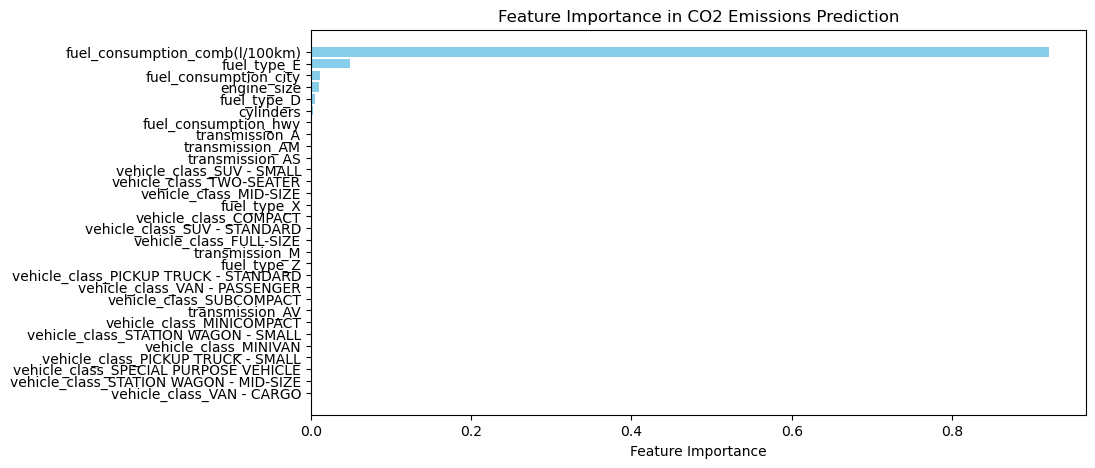

In [41]:
# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[sorted_idx], feature_importance[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in CO2 Emissions Prediction")
plt.gca().invert_yaxis()
plt.show()